<a href="https://colab.research.google.com/github/satuelisa/misc/blob/master/stem2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Network Science workshop

Demo code to interact with.

In [64]:
import networkx as nx # for graphs
from random import randint # pseudo-randomness
import matplotlib.pyplot as plt # for drawings

In [65]:
G = nx.Graph() # simple undirected graph
n = 7 # graph order (= number of vertices)
m = 2 * n # graph size (= number of edges)

In [66]:
G.add_nodes_from(range(1, n + 1)) # add vertices 1, 2, ..., n

while len(G.edges) < m: # add edges until the goal size is reached
    v = randint(1, n) # pick a vertex uniformly at random
    u = randint(1, n) # pick another
    if v != u: # if they differ, add it
        G.add_edge(v, u) # unit weight by default

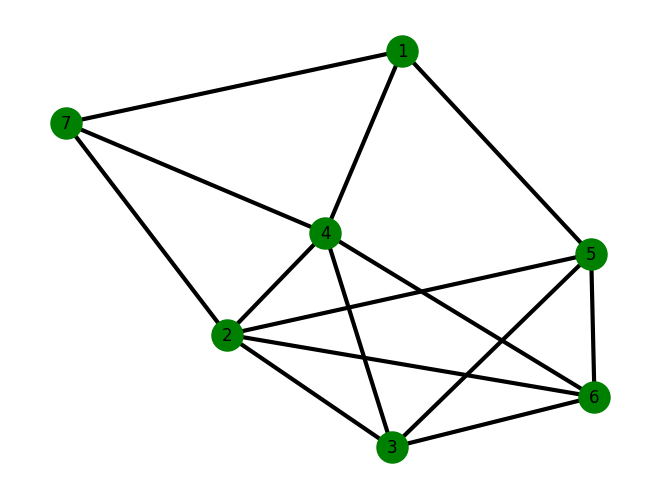

In [67]:
# set some options for the drawing
opt = { 'node_color': 'green',
        'node_size': 500,
        'width': 3,
        'with_labels': True }
coords = nx.spring_layout(G) # fix the positions
nx.draw(G, pos = coords, **opt) # create a drawing

Example graph from real-world data

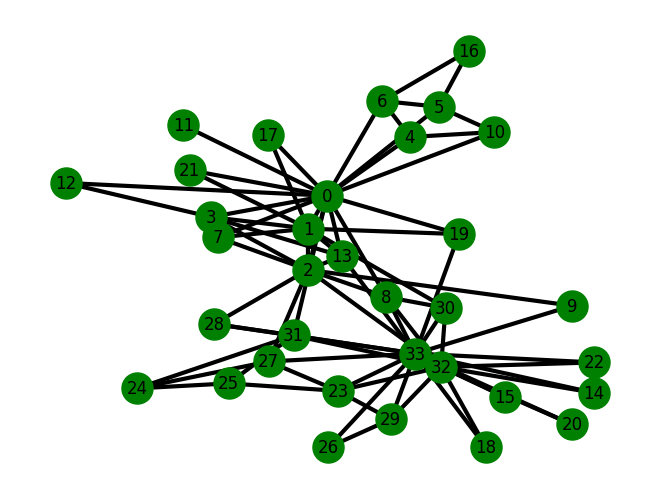

In [68]:
G = nx.karate_club_graph()
coords = nx.spring_layout(G)
nx.draw(G, pos = coords, **opt)

Examples of generation models and layouts

In [69]:
opt = { 'node_size': 20,
        'width': 2,
        'font_size': 5,
        'with_labels': True,
        'font_color': 'black',
        'edge_color': 'gray',
        'node_color': 'orange'}

examples = [ (nx.generators.classic.complete_graph(12), 'complete'), # graph order, everything connected
             (nx.generators.lattice.triangular_lattice_graph(5, 4), 'tri'), # triangles in a 2D grid
             (nx.generators.lattice.grid_2d_graph(5, 4), 'square'), # squares in a 2D grid
             (nx.generators.lattice.hexagonal_lattice_graph(3, 3), 'hex'), # hexagons in a 2D grid
             (nx.generators.random_graphs.connected_watts_strogatz_graph(20, 4, 0.15), 'ws'), # along a circle, neighbor connections, random crossings
             (nx.generators.random_graphs.random_regular_graph(3, 16), 'regular'), # x neighbors each, y in total
             (nx.generators.random_graphs.gnm_random_graph(20, 35), 'erdos'), # randomized, how many nodes and how many edges
             (nx.generators.classic.circular_ladder_graph(12), 'circ'), # like a ladder but it loops
             (nx.generators.classic.ladder_graph(12), 'ladder'), # that many pairs, forming a path
             (nx.generators.random_graphs.barabasi_albert_graph(15, 3), 'ba'), # rich get richer
             (nx.generators.random_graphs.powerlaw_cluster_graph(20, 4, 0.15), 'tree'), # ???
             (nx.generators.classic.star_graph(20), 'star'), # one central, n around it
             (nx.generators.classic.barbell_graph(6, 2), 'barbell'), # two complete graphs and a path between
             (nx.generators.classic.wheel_graph(12), 'wheel'), # # like a star but with an outer shell
             (nx.generators.classic.path_graph(12), 'path') ] # graph order, sequence

layouts = [ (nx.spectral_layout, 'spectral'),
            (nx.kamada_kawai_layout, 'KK'),
            (nx.spring_layout, 'spring'),
            (nx.circular_layout, 'circular') ]

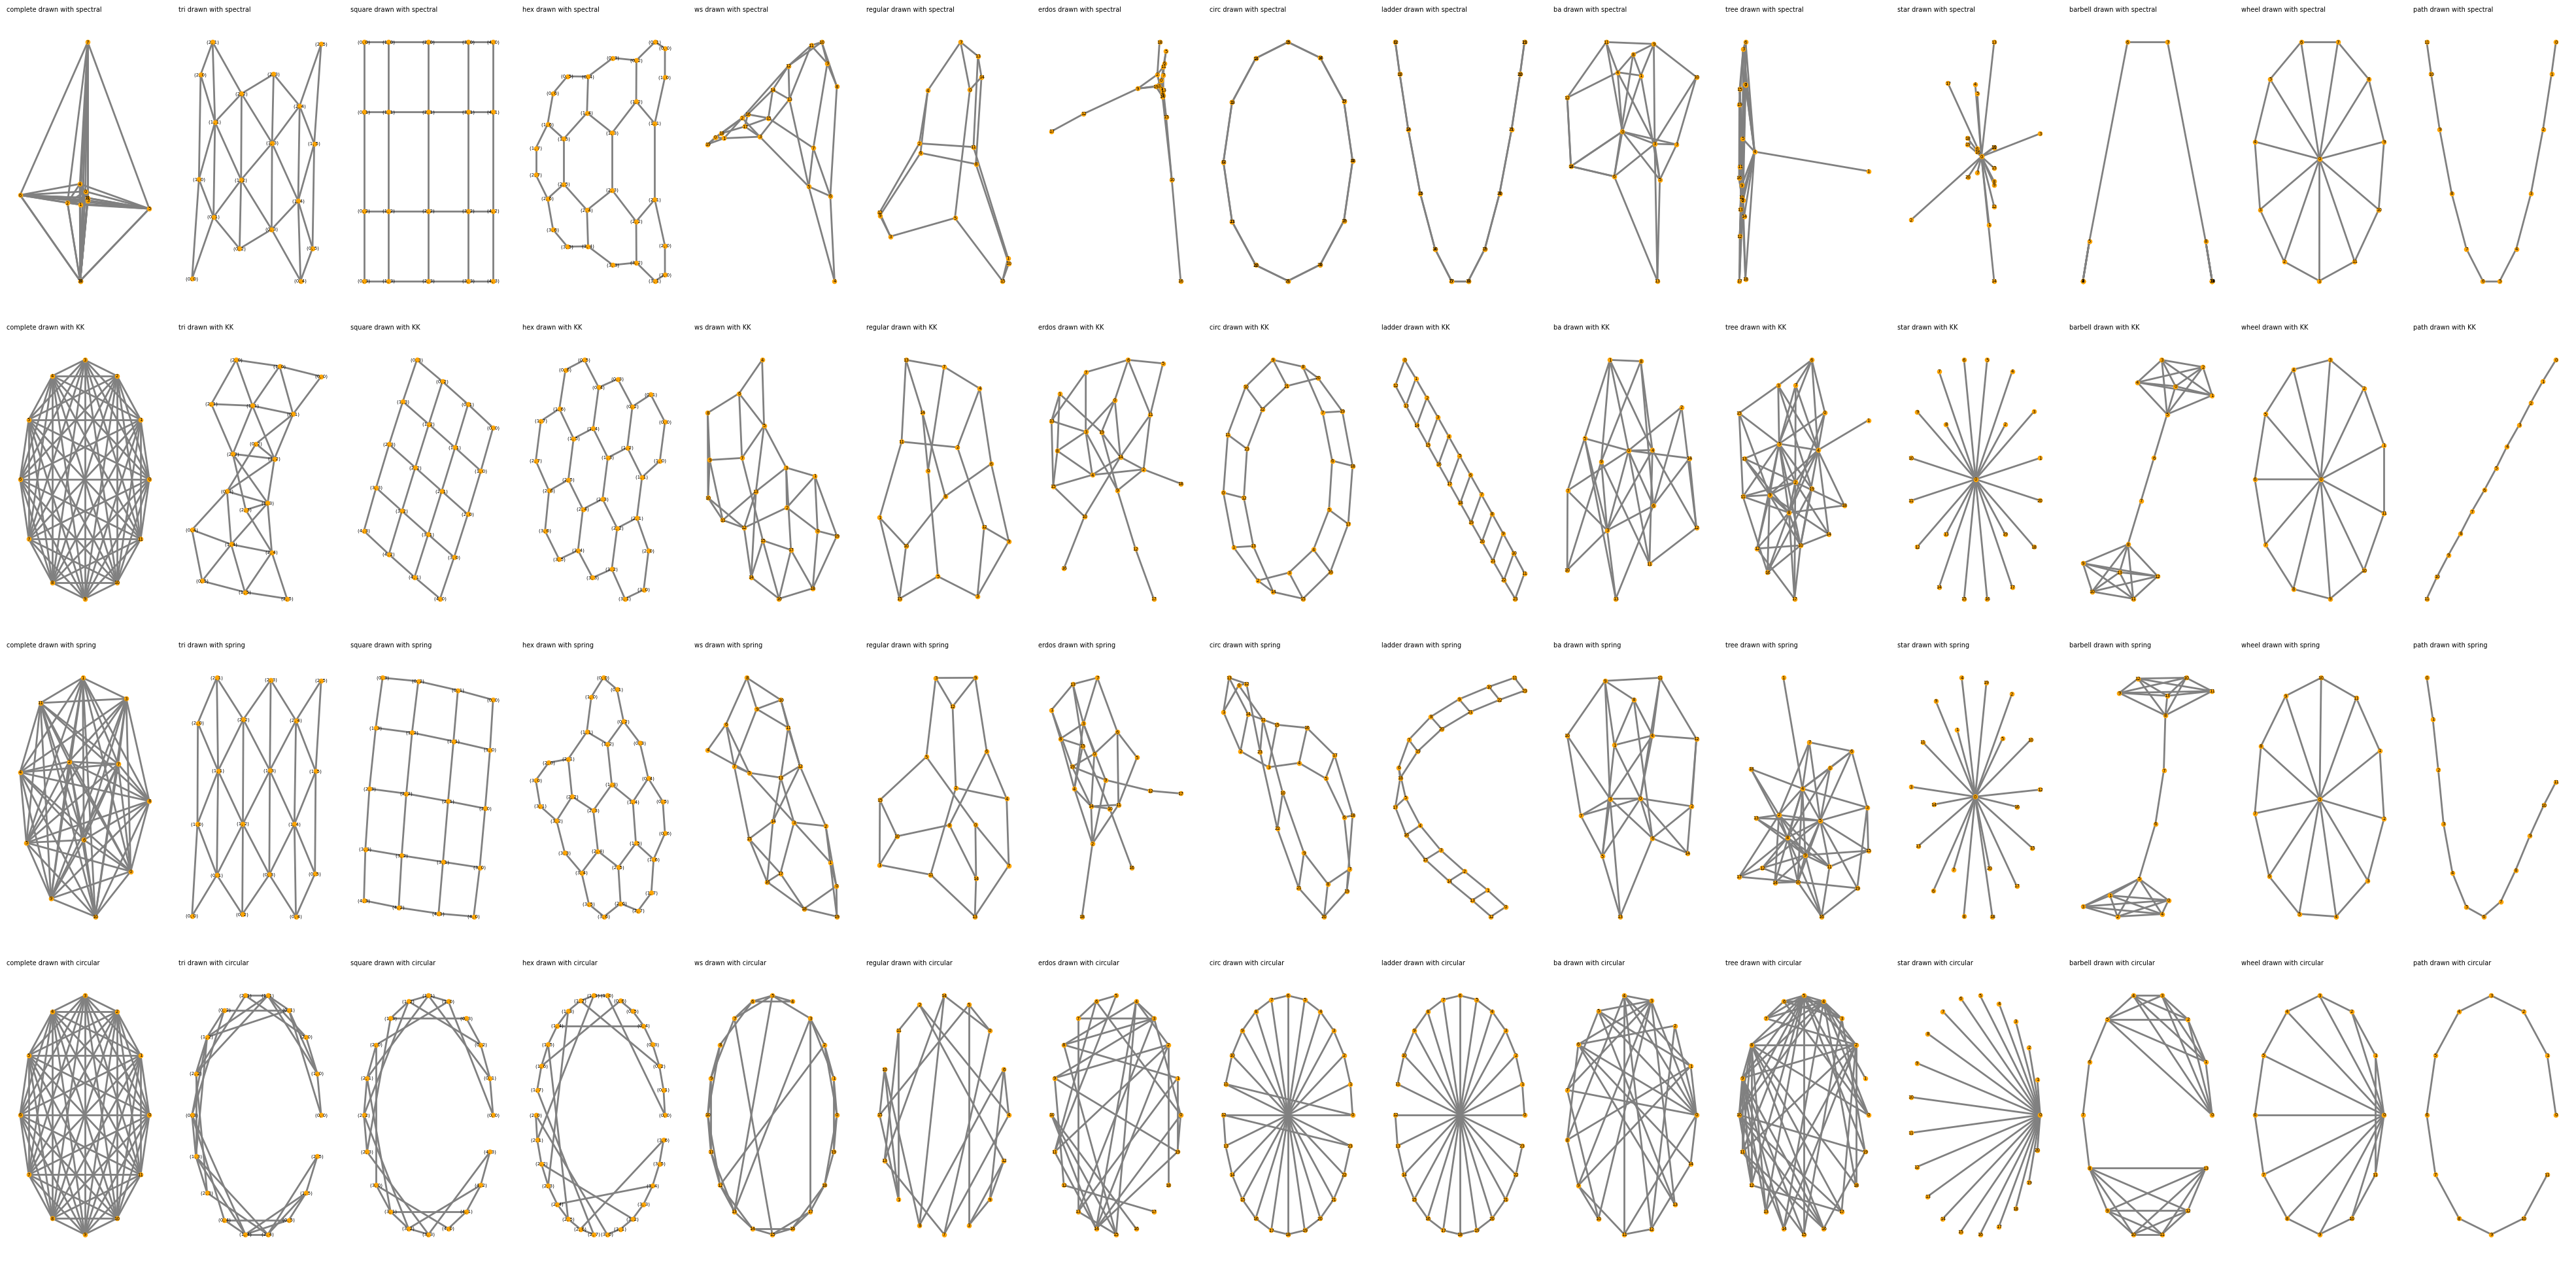

In [70]:
from matplotlib.gridspec import GridSpec
fig = plt.figure(constrained_layout = False, figsize = (40, 20))

rows = len(layouts)
cols = len(examples)
gs = GridSpec(rows, cols, figure = fig, wspace = 0.1, hspace = 0.1)

plt.gca().set_axis_off()
plt.subplots_adjust(top = 0.95, bottom = 0, right = 1, left = 0.02, hspace = 0, wspace = 0)
plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

row = 0
col = 0
for (l, ll) in layouts:
  for (G, gl) in examples:
    ax = fig.add_subplot(gs[row, col])
    col += 1
    if col == cols:
      row += 1
      col = 0
    nx.draw(G, pos = l(G), ax = ax, **opt)
    _ = ax.axis('off')
    plt.title(gl + ' drawn with ' + ll, loc = 'left', fontsize = 7)
fig.show()

Structural properties

In [71]:
from networkx.generators.random_graphs import powerlaw_cluster_graph
G = powerlaw_cluster_graph(15, 4, 0.1)
coords = nx.kamada_kawai_layout(G)
rank = nx.pagerank(G) # default damping
print(list(rank.items())[:5])

[(0, 0.049125635760259495), (1, 0.04781711948651556), (2, 0.07666244279003101), (3, 0.04867787551504811), (4, 0.11763010762644308)]


In [72]:
from math import log

# normalize to [0, 1] and logscale
low = min(rank.values())
high = max(rank.values())
span = high - low
if low < high:
  rank = [ 2 * log((rank[v] - low) / span + 1) for v in G.nodes() ]

In [73]:
opt = { 'node_size': 200,
        'width': 3,
        'with_labels': True,
        'font_color': 'black',
        'edge_color': 'orange' }

(-1.1950064303700085,
 1.052210529131994,
 -1.0920484500673648,
 1.0925843639998618)

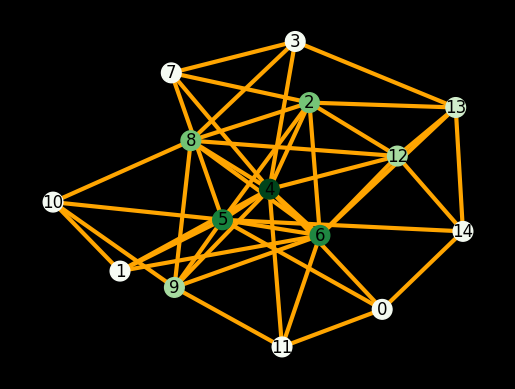

In [74]:
fig, ax = plt.subplots()
nx.draw(G,
        pos = coords,
        cmap = plt.get_cmap('Greens'), # https://matplotlib.org/stable/tutorials/colors/colormaps.html
        node_color = [ rank[v] for v in G.nodes() ], **opt)
ax.set_facecolor('black')
fig.set_facecolor('black')
ax.axis('off')

In [75]:
from networkx.algorithms.centrality import edge_betweenness_centrality
centrality = edge_betweenness_centrality(G)
print(list(centrality.items())[:3])

[((0, 4), 0.057142857142857155), ((0, 5), 0.04206349206349206), ((0, 11), 0.027777777777777783)]


In [76]:
# normalize to [0, 1]
low = min(centrality.values())
high = max(centrality.values())
span = high - low
if low < high:
  weight = [(centrality[e] - low) / span for e in G.edges()]
else:
  weight = centrality

(-1.1950064303700085,
 1.052210529131994,
 -1.0920484500673648,
 1.0925843639998618)

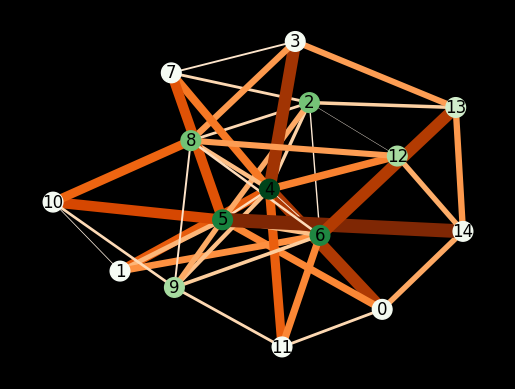

In [77]:
if 'width' in opt:
  del opt['width'] # discard if present
width = 10 # set a maximum
if 'edge_color' in opt:
  del opt['edge_color']
fig, ax = plt.subplots()
nx.draw(G,
        pos = coords,
        cmap = plt.get_cmap('Greens'),
        edge_cmap = plt.get_cmap('Oranges'),
        node_color = rank,
        edge_color = weight,
        width = [width * w for w in weight] ,
        **opt)
ax.set_facecolor('black')
fig.set_facecolor('black')
ax.axis('off')

In [78]:
G2 = nx.ring_of_cliques(7, 12)
clusters = nx.community.greedy_modularity_communities(G2)
for c in clusters:
  print(c)

frozenset({0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11})
frozenset({12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23})
frozenset({32, 33, 34, 35, 24, 25, 26, 27, 28, 29, 30, 31})
frozenset({36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47})
frozenset({48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59})
frozenset({64, 65, 66, 67, 68, 69, 70, 71, 60, 61, 62, 63})
frozenset({72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83})


In [79]:
import seaborn as sns
cc = sns.color_palette('hls', len(clusters))
cv = dict()
i = 0
for cluster in clusters:
  color = cc[i]
  i += 1
  for v in cluster:
    cv[v] = color

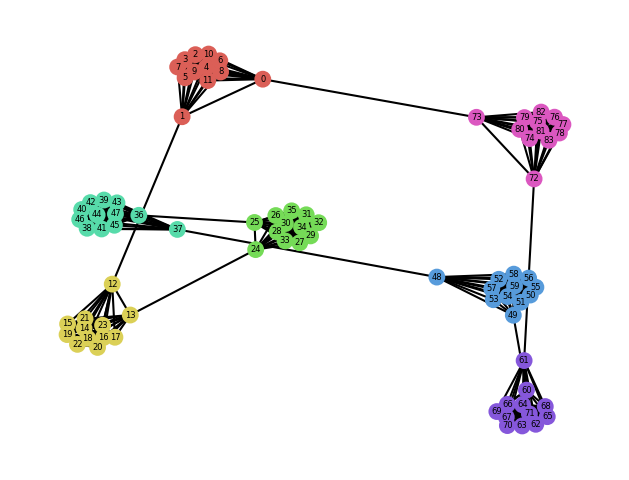

In [80]:
fig = plt.figure(1, figsize = (4, 3), dpi =  150)
pos = nx.spring_layout(G2)
nx.draw(G2, pos, node_color = [ cv.get(v, 'gray') for v in G2.nodes ], node_size = 50)
l = nx.draw_networkx_labels(G2, pos, font_size = 4)

Combinatorial optimization

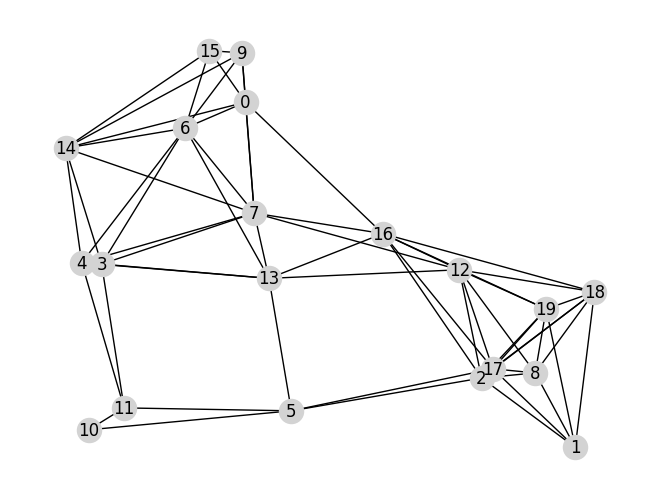

In [81]:
from random import random

n = 20 # order
r = 0.4 # radius
pos = { i: (random(), random()) for i in range(n) }
G = nx.random_geometric_graph(n, r, pos = pos)

coords = nx.get_node_attributes(G, 'pos')
nx.draw(G, coords, node_color = 'lightgray')
l = nx.draw_networkx_labels(G, pos = coords)

In [82]:
result = nx.coloring.greedy_color(G, strategy = 'largest_first')
print(result)
used = set(result.values())
print(used)
count = len(used)

{7: 0, 2: 0, 6: 1, 12: 1, 16: 2, 17: 3, 13: 3, 14: 2, 18: 4, 19: 5, 0: 3, 3: 4, 4: 5, 8: 2, 1: 1, 5: 1, 9: 4, 11: 0, 15: 0, 10: 2}
{0, 1, 2, 3, 4, 5}


In [83]:
colors = sns.color_palette('husl', count)
colors

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.7350228985632719, 0.5952719904750953, 0.1944419133847522),
 (0.3126890019504329, 0.6928754610296064, 0.1923704830330379),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.23299120924703914, 0.639586552066035, 0.9260706093977744),
 (0.9082572436765556, 0.40195790729656516, 0.9576909250290225)]

In [84]:
ca = []
for v in G.nodes():
  ca.append(colors[result[v]])
print(ca[:3])

[(0.21044753832183283, 0.6773105080456748, 0.6433941168468681), (0.7350228985632719, 0.5952719904750953, 0.1944419133847522), (0.9677975592919913, 0.44127456009157356, 0.5358103155058701)]


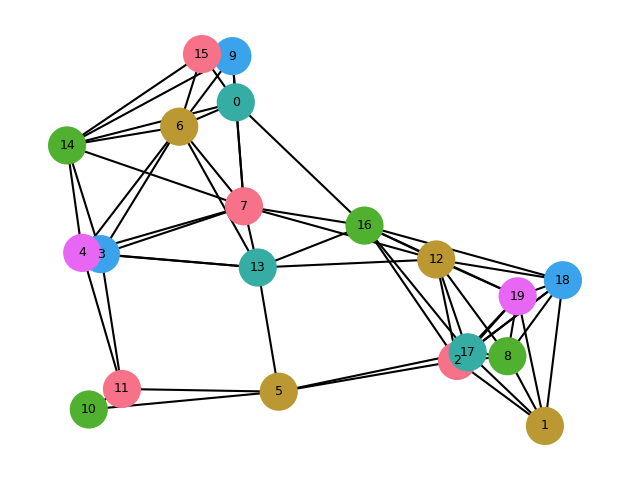

In [85]:
import matplotlib.pyplot as plt
fig = plt.figure(1, figsize = (4, 3), dpi =  150)
coords = nx.get_node_attributes(G, 'pos')
nx.draw(G, coords, node_color = ca)
l = nx.draw_networkx_labels(G, pos = coords, font_size = 6)

In [86]:
n = 15 # order
r = 0.45 # radius
pos = { i: (random(), random()) for i in range(n) }
G = nx.random_geometric_graph(n, r, pos = pos)

coords = nx.get_node_attributes(G, 'pos')
mst = nx.minimum_spanning_tree(G, weight = "cost", algorithm = "kruskal")
print(G, 'MST', mst)

Graph with 15 nodes and 34 edges MST Graph with 15 nodes and 14 edges


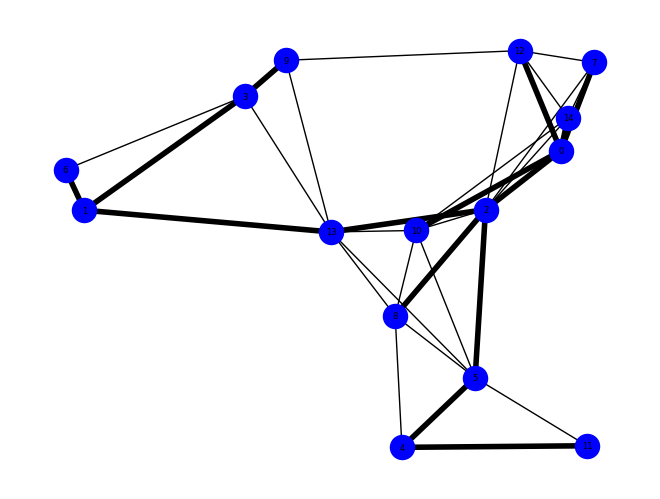

In [87]:
both = []
for e in mst.edges:
  both.append(e)
  (s, t) = e
  both.append((t, s))

thick = 4
thin = 1
ew = [ thick if e in both else thin for e in G.edges() ]

nx.draw(G, coords, node_color = 'blue', width = ew)
l = nx.draw_networkx_labels(G, pos = coords, font_size = 6)

In [88]:
t = 20 # how many towns
G = nx.Graph()

for i in range(t):
  x = random()
  y = random()
  G.add_node(i, pos = (x, y)) # call the towns 0, 1, 2, ...

from math import sqrt

def distance(p1, p2):
  (x1, y1) = p1
  (x2, y2) = p2
  return sqrt((x1 - x2)**2 + (y1 - y2)**2)

for t1 in G.nodes:
  l1 = G.nodes[t1]['pos']
  for t2 in G.nodes:
    if t1 != t2:
      l2 = G.nodes[t2]['pos']
      cost = distance(l1, l2)
      G.add_edge(t1, t2, weight = cost)

In [89]:
c = nx.approximation.traveling_salesman_problem(G)
print(c)

[0, 11, 12, 4, 16, 1, 6, 17, 19, 10, 3, 2, 14, 18, 7, 5, 15, 8, 9, 13, 0]


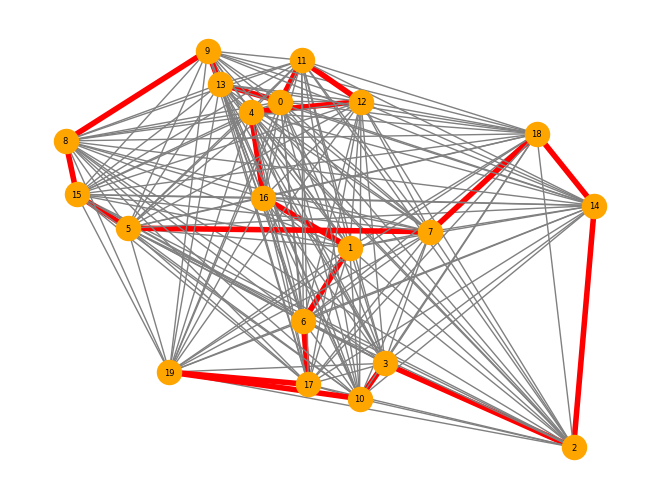

In [90]:
used = []
v = None
w = None
for u in c:
  if v is None:
    v = u
  elif w is None:
    w = u
  else:
    used.append((v, w))
    v, w = w, u
used.append((v, w))
used.append((w, c[0]))

both = []
for e in used:
  both.append(e)
  (s, t) = e
  both.append((t, s))

thick = 4
thin = 1
ew = [ thick if e in both else thin for e in G.edges() ]
ec = [ 'red' if e in both else 'gray' for e in G.edges() ]

coords = nx.get_node_attributes(G, 'pos')
nx.draw(G, coords, node_color = 'orange', width = ew, edge_color = ec)
l = nx.draw_networkx_labels(G, pos = coords, font_size = 6)

Example application: epidemiology

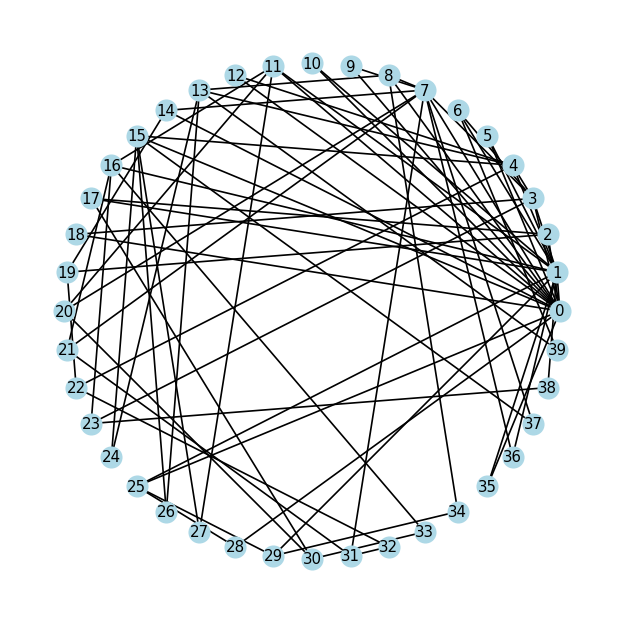

In [91]:
n = 40 # how many people (they will arrive one by one)
conn = 2 # how many connections each arriving person forms
G = nx.barabasi_albert_graph(n, conn)
L = nx.circular_layout(G)

fig = plt.figure(1, figsize = (5, 5), dpi =  120)
S = 'lightblue'
I = 'orange'
R = 'purple'

nx.draw(G, L, node_color = S, node_size = 150)
l = nx.draw_networkx_labels(G, pos = L, font_size = 9)

In [92]:
def contagions(contagion = 0.15):
  global spread, infected, newlyInfected
  for v in infected:
      for u in G.neighbors(v):
        if u in infected: # already sick
          continue
        if u in recovered: # no re-infection
          continue
        if random() < contagion:
          spread.add((v, u))
          spread.add((u, v))
          newlyInfected.add(u)
  infected.update(newlyInfected)

def recoveries(recovery = 0.1):
  global recovered, infected, newlyInfected
  for v in infected:
    if v not in newlyInfected:
      if random() < recovery:
        recovered.add(v)
  infected -= recovered
  newlyInfected = set()


def visualize():
  global G, L, infected, recovered, spread
  Vs = [ I if v in infected else (R if v in recovered else S) for v in G.nodes ]
  Es = [ I if (v, u) in spread else 'black' for v, u in G.edges ]
  nx.draw(G, L, node_color = Vs, edge_color = Es)
  l = nx.draw_networkx_labels(G, pos = L)

def epidemic(t):
  visualize()
  contagions()
  recoveries()

In [93]:
from random import sample

def init(people = 30, contacts = 2, perc = 0.05, show = True):
  global G, L, recovered, spread, infected, newlyInfected
  G = nx.barabasi_albert_graph(people, contacts)
  L = nx.circular_layout(G)
  recovered = set() # nobody yet
  spread = set() # nothing yet
  newlyInfected = set()
  infected = set(sample(list(G.nodes), round(perc * people)))
  if show:
    visualize()

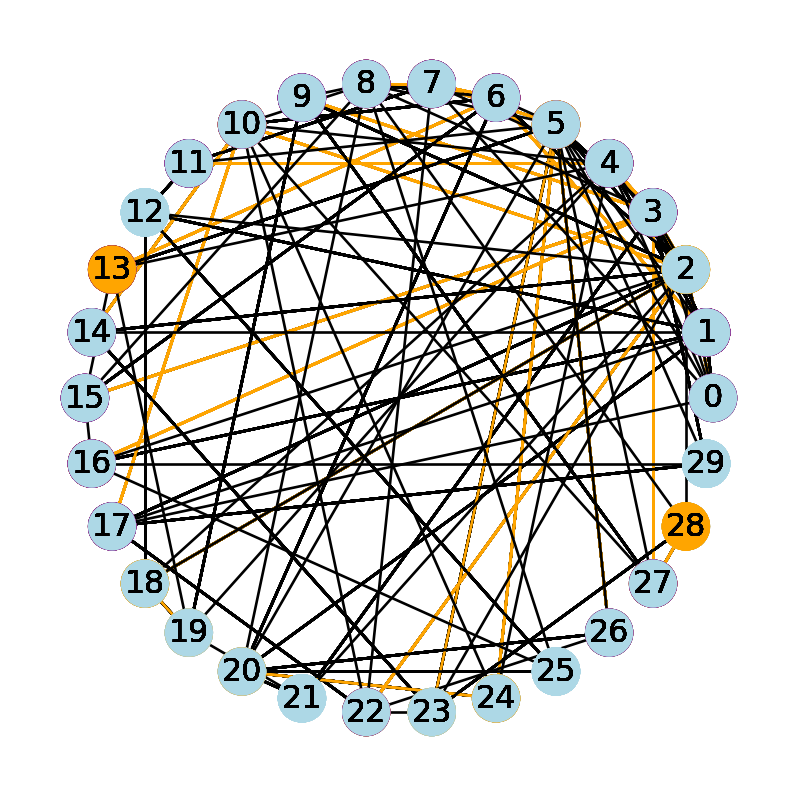

In [94]:
from matplotlib import rc
rc('animation', html = 'jshtml')
import matplotlib.animation as animation

duration = 15
fig = plt.figure(figsize = (4, 4), dpi = 190)
plt.clf()

animation.FuncAnimation(fig, epidemic, frames = duration, repeat = False, init_func = init, interval = 300)

In [95]:
timeseries = { 'S' : [], 'I' : [], 'R' : [] }
n = 2000
init(n, 5, 0.01, show = False)
i = len(infected)
timeseries['I'].append(i)
timeseries['S'].append(n - i)
timeseries['R'].append(0)

permitted = 100
while len(infected) > 0 and permitted > 0:
    contagions(0.15)
    recoveries(0.3)
    i = len(infected)
    r = len(recovered)
    s = n - (i + r) # the rest
    timeseries['S'].append(s)
    timeseries['I'].append(i)
    timeseries['R'].append(r)
    permitted -= 1

for kind in timeseries:
  print(kind, timeseries[kind][:5], timeseries[kind][-5:])

S [1980, 1966, 1908, 1707, 1328] [91, 91, 91, 91, 91]
I [20, 28, 79, 260, 564] [2, 2, 2, 2, 0]
R [0, 6, 13, 33, 108] [1907, 1907, 1907, 1907, 1909]


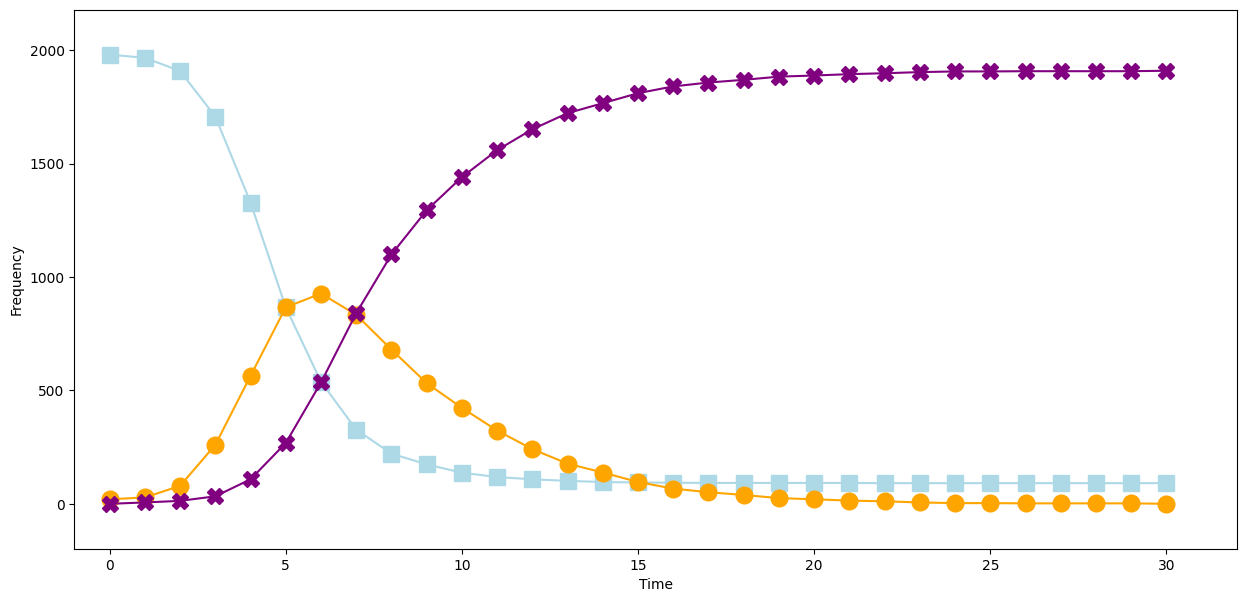

In [96]:
fig = plt.figure(figsize = (15, 7), dpi =  100)
ax = plt.subplot(1, 1, 1)
l = len(timeseries['S'])
plt.xlim(-1, l + 1)
high = max ( [ max(d) for d in timeseries.values() ] )
margin = 0.1 * high
plt.ylim(0 - margin, high + margin)
color = { 'I' : I, 'S' : S, 'R' : R }
marker = { 'I' : 'o', 'S' : 's', 'R' : 'X'}
t = [ i for i in range(l) ]
for kind in timeseries:
    ax.plot(t, timeseries[kind], c = color[kind], marker = marker[kind], ms = 12)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()